# Sentiment Analysis
## Install the required packages

In [ ]:
! pip install pandas statsmodels numpy scikit-learn scipy seaborn

In [1]:
# Let's start by importing the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import os

## Calculate Metrics Per Transcript

In [2]:
import one_off

# # Approximately takes 2:30 / item in Dan's computer
# all_transcripts_df = one_off.main()

# all_transcripts_df

# Use the saved data to avoid running the code above
all_transcripts_df = pd.read_csv('transcript_dfs/all_transcripts_df.csv')

# Print length of the dataframe
print(len(all_transcripts_df))

all_transcripts_df.head()

127


,id,title,ae_name,ae_email,sales_outcome,date,meeting_attendees,host_email,transcript_url,video_url,...,sadness,surprise,sentiment_balance_ratio,ae_sentiment,client_sentiment,ae_sentiment_variability,client_sentiment_variability,ae_sentiment_trend,client_sentiment_trend,emotional_reciprocity
0,0OXXlNjov0KYgNWS,Judy <> My Amazon Guy,Matt Lopez,matt.lopez@myamazonguy.com,closed_won,2023/08/17,"matt.lopez@myamazonguy.com, judy@microdermamit...",matt.lopez@myamazonguy.com,https://app.fireflies.ai/view/0OXXlNjov0KYgNWS,https://cdn.fireflies.ai/0OXXlNjov0KYgNWS/vide...,...,0.017923,0.066656,0.949627,0.048617,0.014313,0.361378,0.376177,0.000236,0.000952,0.105060
1,1HpklzhnzCB6f55I,Yori Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/06/01,"shawn.henderson@myamazonguy.com, takeda@atlasw...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/1HpklzhnzCB6f55I,https://cdn.fireflies.ai/1HpklzhnzCB6f55I/vide...,...,0.029280,0.085133,1.320543,0.065453,0.056603,0.385235,0.517258,-0.000379,0.000655,0.276824
2,1K0Xns6GMcZw85Wp,Katty Meet with My Amazon Guy,Kimberly Caranay,kimberly@myamazonguy.com,closed_won,2023/05/11,"kimberly@myamazonguy.com, katty.corobo@corstor...",kimberly@myamazonguy.com,https://app.fireflies.ai/view/1K0Xns6GMcZw85Wp,https://cdn.fireflies.ai/1K0Xns6GMcZw85Wp/vide...,...,0.075275,0.103447,0.405465,0.007417,-0.003657,0.382050,0.398797,0.001527,0.001437,0.045662
3,1WzbVLTMVPCkJrty,Matt<> My Amazon Guy,Matt Lopez,matt.lopez@myamazonguy.com,closed_lost,2024/08/16,"theresa.gonzaga@myamazonguy.com, matt.lopez@my...",theresa.gonzaga@myamazonguy.com,https://app.fireflies.ai/view/1WzbVLTMVPCkJrty,https://cdn.fireflies.ai/1WzbVLTMVPCkJrty/vide...,...,0.017653,0.057158,0.705196,0.042730,0.008473,0.369109,0.452822,-0.000085,0.000215,0.128975
4,345T7ZV7uspK0vB4,<> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_lost,2024/07/18,"shawn.henderson@myamazonguy.com, jeremiah.pala...",jeremiah.palapag@myamazonguy.com,https://app.fireflies.ai/view/345T7ZV7uspK0vB4,https://cdn.fireflies.ai/345T7ZV7uspK0vB4/vide...,...,0.027004,0.058005,0.853202,0.000000,0.030110,0.000000,0.372912,0.000000,0.000106,0.000000


## Clean Data
I have cleaned the data by removing ratios that are either 0.0 or 1.0. These ratios are not useful for the analysis as they do not provide any information about a conversation between two people.

In [4]:
# Save all_transcripts_df to a csv file if the file does not exist
if not os.path.exists('transcript_dfs/all_transcripts_df.csv'):
	all_transcripts_df.to_csv('transcript_dfs/all_transcripts_df.csv', index=False)

# Remove rows that have 1.0 or 0.0 as the value for the ae_talk_ratio
has_two_parties_df = all_transcripts_df.loc[(all_transcripts_df['ae_talk_ratio'] != 1.0) & (all_transcripts_df['ae_talk_ratio'] != 0.0)].copy()
has_two_parties_df.loc[:, 'sales_outcome_binary'] = has_two_parties_df['sales_outcome'].map({'closed_won': 1, 'closed_lost': 0})

# Print length of the dataframe
print(len(has_two_parties_df))
has_two_parties_df.head()

117


,id,title,ae_name,ae_email,sales_outcome,date,meeting_attendees,host_email,transcript_url,video_url,...,surprise,sentiment_balance_ratio,ae_sentiment,client_sentiment,ae_sentiment_variability,client_sentiment_variability,ae_sentiment_trend,client_sentiment_trend,emotional_reciprocity,sales_outcome_binary
0,0OXXlNjov0KYgNWS,Judy <> My Amazon Guy,Matt Lopez,matt.lopez@myamazonguy.com,closed_won,2023/08/17,"matt.lopez@myamazonguy.com, judy@microdermamit...",matt.lopez@myamazonguy.com,https://app.fireflies.ai/view/0OXXlNjov0KYgNWS,https://cdn.fireflies.ai/0OXXlNjov0KYgNWS/vide...,...,0.066656,0.949627,0.048617,0.014313,0.361378,0.376177,0.000236,0.000952,0.105060,1
1,1HpklzhnzCB6f55I,Yori Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/06/01,"shawn.henderson@myamazonguy.com, takeda@atlasw...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/1HpklzhnzCB6f55I,https://cdn.fireflies.ai/1HpklzhnzCB6f55I/vide...,...,0.085133,1.320543,0.065453,0.056603,0.385235,0.517258,-0.000379,0.000655,0.276824,1
2,1K0Xns6GMcZw85Wp,Katty Meet with My Amazon Guy,Kimberly Caranay,kimberly@myamazonguy.com,closed_won,2023/05/11,"kimberly@myamazonguy.com, katty.corobo@corstor...",kimberly@myamazonguy.com,https://app.fireflies.ai/view/1K0Xns6GMcZw85Wp,https://cdn.fireflies.ai/1K0Xns6GMcZw85Wp/vide...,...,0.103447,0.405465,0.007417,-0.003657,0.382050,0.398797,0.001527,0.001437,0.045662,1
3,1WzbVLTMVPCkJrty,Matt<> My Amazon Guy,Matt Lopez,matt.lopez@myamazonguy.com,closed_lost,2024/08/16,"theresa.gonzaga@myamazonguy.com, matt.lopez@my...",theresa.gonzaga@myamazonguy.com,https://app.fireflies.ai/view/1WzbVLTMVPCkJrty,https://cdn.fireflies.ai/1WzbVLTMVPCkJrty/vide...,...,0.057158,0.705196,0.042730,0.008473,0.369109,0.452822,-0.000085,0.000215,0.128975,0
6,3kKe4Z7Hrlf60sqn,Logan<> My Amazon Guy,Matt Lopez,matt.lopez@myamazonguy.com,closed_lost,2024/08/08,"theresa.gonzaga@myamazonguy.com, matt.lopez@my...",theresa.gonzaga@myamazonguy.com,https://app.fireflies.ai/view/3kKe4Z7Hrlf60sqn,https://cdn.fireflies.ai/3kKe4Z7Hrlf60sqn/vide...,...,0.057610,0.581142,0.034960,0.009011,0.370320,0.407403,0.000152,-0.000190,0.048743,0


## Statistical Testing

### Option 1

In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# List of variables to test
variables = [
    'emotional_intensity_score', 'anger', 'disgust', 'fear', 'joy', 'sadness',
    'surprise', 'sentiment_balance_ratio', 'ae_sentiment', 'client_sentiment',
    'ae_sentiment_variability', 'client_sentiment_variability', 'ae_sentiment_trend',
    'client_sentiment_trend', 'emotional_reciprocity'
]

# Ensure there are no missing values in the outcome variable
has_two_parties_df = has_two_parties_df.dropna(subset=['sales_outcome_binary'])

# Split the data into two groups
won_group = has_two_parties_df[has_two_parties_df['sales_outcome_binary'] == 1]
lost_group = has_two_parties_df[has_two_parties_df['sales_outcome_binary'] == 0]

# Initialize a list to store results
results = []

for var in variables:
    # Drop missing values for the current variable
    won_data = won_group[var].dropna()
    lost_data = lost_group[var].dropna()
    
    # Perform Welch's t-test
    t_stat, p_value = ttest_ind(won_data, lost_data, equal_var=False)
    
    # Append results
    results.append({
        'Variable': var,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Adjust for multiple comparisons using Bonferroni correction
num_tests = len(variables)
alpha = 0.05
adjusted_alpha = alpha / num_tests
results_df['Significant'] = results_df['p-value'] < adjusted_alpha

# Display the results
results_df = results_df.sort_values('p-value')
results_df

,Variable,t-statistic,p-value,Significant
7,sentiment_balance_ratio,-3.214852,0.001701,True
8,ae_sentiment,-2.796153,0.006089,False
3,fear,2.669325,0.008748,False
5,sadness,2.104605,0.037512,False
9,client_sentiment,-1.859221,0.066779,False
13,client_sentiment_trend,1.709976,0.092807,False
4,joy,-1.653966,0.101114,False
6,surprise,1.523232,0.131953,False
14,emotional_reciprocity,1.430016,0.155764,False
11,client_sentiment_variability,1.343599,0.181959,False


### Option 2

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests
import warnings

# Suppress warnings for clarity
warnings.filterwarnings('ignore')

# List of variables to test
variables = [
    'emotional_intensity_score', 'anger', 'disgust', 'fear', 'joy', 'sadness',
    'surprise', 'sentiment_balance_ratio', 'ae_sentiment', 'client_sentiment',
    'ae_sentiment_variability', 'client_sentiment_variability', 'ae_sentiment_trend',
    'client_sentiment_trend', 'emotional_reciprocity'
]

# Ensure there are no missing values in the outcome variable
has_two_parties_df = has_two_parties_df.dropna(subset=['sales_outcome_binary'])

# Split the data into two groups
won_group = has_two_parties_df[has_two_parties_df['sales_outcome_binary'] == 1]
lost_group = has_two_parties_df[has_two_parties_df['sales_outcome_binary'] == 0]

# Initialize a list to store results
results = []

for var in variables:
    # Extract data and drop missing values
    won_data = won_group[var].dropna()
    lost_data = lost_group[var].dropna()
    
    # Initialize dictionary to store results for this variable
    result = {'Variable': var}
    
    # Perform Shapiro-Wilk test for normality
    stat_won, p_won = shapiro(won_data)
    stat_lost, p_lost = shapiro(lost_data)
    result['Shapiro-Wilk Won p-value'] = p_won
    result['Normality Won'] = 'Normal' if p_won > 0.05 else 'Not Normal'
    result['Shapiro-Wilk Lost p-value'] = p_lost
    result['Normality Lost'] = 'Normal' if p_lost > 0.05 else 'Not Normal'
    
    # Perform Levene's test for equal variances
    levene_stat, levene_p = levene(won_data, lost_data)
    result['Levene p-value'] = levene_p
    result['Equal Variance'] = 'Equal Variance' if levene_p > 0.05 else 'Unequal Variance'
    
    # Decide which test to use
    if result['Normality Won'] == 'Normal' and result['Normality Lost'] == 'Normal':
        # Use t-test
        if levene_p > 0.05:
            # Equal variances assumed
            t_stat, p_value = ttest_ind(won_data, lost_data, equal_var=True)
            test_used = 'Independent t-test (equal variances)'
        else:
            # Equal variances not assumed (Welch's t-test)
            t_stat, p_value = ttest_ind(won_data, lost_data, equal_var=False)
            test_used = "Welch's t-test (unequal variances)"
    else:
        # Use Mann-Whitney U test
        t_stat, p_value = mannwhitneyu(won_data, lost_data, alternative='two-sided')
        test_used = 'Mann-Whitney U test'
    
    result['Test Used'] = test_used
    result['Test Statistic'] = t_stat
    result['Unadjusted p-value'] = p_value  # Store unadjusted p-value
    
    # Append the result for this variable to the list
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Extract unadjusted p-values for correction
p_values = results_df['Unadjusted p-value'].values

# Apply Holm-Bonferroni correction
reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(p_values, alpha=0.05, method='holm')

# Add corrected p-values and significance to the DataFrame
results_df['Holm-Bonferroni p-value'] = pvals_corrected
results_df['Significant'] = ['Yes' if r else 'No' for r in reject]

# Interpretations and recommendations
interpretations = []
recommendations = []
for idx, row in results_df.iterrows():
    var = row['Variable']
    if row['Significant'] == 'Yes':
        interpretation = f"There is a statistically significant difference in '{var}' between won and lost sales."
        recommendation = f"Consider including '{var}' as a predictor in the sales outcome model."
    else:
        interpretation = f"No statistically significant difference in '{var}' between won and lost sales."
        recommendation = f"'{var}' may not be a strong predictor of sales outcome."
    interpretations.append(interpretation)
    recommendations.append(recommendation)

results_df['Interpretation'] = interpretations
results_df['Recommendation'] = recommendations

# Reorder columns for clarity
results_df = results_df[[
    'Variable', 'Shapiro-Wilk Won p-value', 'Normality Won',
    'Shapiro-Wilk Lost p-value', 'Normality Lost',
    'Levene p-value', 'Equal Variance', 'Test Used',
    'Test Statistic', 'Unadjusted p-value', 'Holm-Bonferroni p-value', 'Significant',
    'Interpretation', 'Recommendation'
]]

# Sort results by adjusted p-value
results_df.sort_values('Holm-Bonferroni p-value', inplace=True)

# Reset index after sorting
results_df.reset_index(drop=True, inplace=True)

# Display the results
results_df


,Variable,Shapiro-Wilk Won p-value,Normality Won,Shapiro-Wilk Lost p-value,Normality Lost,Levene p-value,Equal Variance,Test Used,Test Statistic,Unadjusted p-value,Holm-Bonferroni p-value,Significant,Interpretation,Recommendation
0,fear,2.525816e-09,Not Normal,2.581542e-09,Not Normal,0.063208,Equal Variance,Mann-Whitney U test,2257.0,0.001620,0.024299,Yes,There is a statistically significant differenc...,Consider including 'fear' as a predictor in th...
1,sentiment_balance_ratio,4.560102e-02,Not Normal,5.199224e-01,Normal,0.070938,Equal Variance,Mann-Whitney U test,1109.0,0.001620,0.024299,Yes,There is a statistically significant differenc...,Consider including 'sentiment_balance_ratio' a...
2,surprise,2.156463e-01,Normal,1.346770e-09,Not Normal,0.282696,Equal Variance,Mann-Whitney U test,2195.0,0.004931,0.064104,No,No statistically significant difference in 'su...,'surprise' may not be a strong predictor of sa...
3,client_sentiment_trend,2.198722e-10,Not Normal,3.863729e-15,Not Normal,0.646004,Equal Variance,Mann-Whitney U test,2162.0,0.008536,0.102428,No,No statistically significant difference in 'cl...,'client_sentiment_trend' may not be a strong p...
4,sadness,7.606328e-09,Not Normal,5.409602e-09,Not Normal,0.143830,Equal Variance,Mann-Whitney U test,2144.0,0.011368,0.125049,No,No statistically significant difference in 'sa...,'sadness' may not be a strong predictor of sal...
5,ae_sentiment,5.850666e-03,Not Normal,2.803202e-04,Not Normal,0.007570,Unequal Variance,Mann-Whitney U test,1231.0,0.013076,0.130755,No,No statistically significant difference in 'ae...,'ae_sentiment' may not be a strong predictor o...
6,joy,8.619758e-04,Not Normal,1.213085e-07,Not Normal,0.444937,Equal Variance,Mann-Whitney U test,1333.0,0.054725,0.492523,No,No statistically significant difference in 'jo...,'joy' may not be a strong predictor of sales o...
7,client_sentiment,5.772577e-01,Normal,1.142223e-10,Not Normal,0.640459,Equal Variance,Mann-Whitney U test,1352.0,0.069275,0.554203,No,No statistically significant difference in 'cl...,'client_sentiment' may not be a strong predict...
8,emotional_reciprocity,4.069198e-02,Not Normal,3.419689e-03,Not Normal,0.771313,Equal Variance,Mann-Whitney U test,2006.0,0.076287,0.554203,No,No statistically significant difference in 'em...,'emotional_reciprocity' may not be a strong pr...
9,emotional_intensity_score,4.116757e-01,Normal,2.790962e-05,Not Normal,0.969413,Equal Variance,Mann-Whitney U test,1961.0,0.127184,0.763104,No,No statistically significant difference in 'em...,'emotional_intensity_score' may not be a stron...


## Correlation Analysis

In [11]:
has_two_parties_df['sales_outcome_binary'] = has_two_parties_df['sales_outcome'].map({'closed_won': 1, 'closed_lost': 0})

# Initialize lists to store results
corr_list = []

# Calculate correlation coefficients and p-values
for var in variables:
    corr_coef, p_value = stats.pearsonr(has_two_parties_df[var], has_two_parties_df['sales_outcome_binary'])
    corr_list.append({
        'Variable': var,
        'Correlation with Sales Outcome': corr_coef,
        'P-value (Correlation)': p_value
    })

# Create a DataFrame from the list
corr_df = pd.DataFrame(corr_list)


## Logistic Regression

In [12]:
# Logistic Regression
# Define predictors and target variable
X = has_two_parties_df[variables]
y = has_two_parties_df['sales_outcome_binary']

# Standardize the predictors
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

# Add constant term for intercept
X_scaled = sm.add_constant(X_scaled)

# Align X_scaled and y to ensure indices match
X_scaled, y = X_scaled.align(y, join='inner', axis=0)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled)
result = logit_model.fit(method='newton', maxiter=100)

# Get the summary of regression results
regression_summary = result.summary2().tables[1]
print(result.summary2())



         Current function value: 0.473672
         Iterations: 100
                                        Results: Logit
Model:                       Logit                        Method:                   MLE       
Dependent Variable:          sales_outcome_binary         Pseudo R-squared:         0.308     
Date:                        2024-10-25 14:22             AIC:                      142.8392  
No. Observations:            117                          BIC:                      187.0339  
Df Model:                    15                           Log-Likelihood:           -55.420   
Df Residuals:                101                          LL-Null:                  -80.134   
Converged:                   0.0000                       LLR p-value:              1.4921e-05
No. Iterations:              100.0000                     Scale:                    1.0000    
----------------------------------------------------------------------------------------------
                       

In [13]:
# Calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_scaled is your predictors DataFrame
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif_data)


                        Variable           VIF
0                          const  1.000000e+00
1      emotional_intensity_score  1.916425e+14
2                          anger  7.588205e+12
3                        disgust  1.912357e+13
4                           fear  2.998402e+12
5                            joy  2.357906e+13
6                        sadness  1.469364e+13
7                       surprise  3.360895e+13
8        sentiment_balance_ratio  6.114148e+00
9                   ae_sentiment  3.112517e+00
10              client_sentiment  5.059300e+00
11      ae_sentiment_variability  1.986110e+00
12  client_sentiment_variability  1.687344e+00
13            ae_sentiment_trend  6.373883e+00
14        client_sentiment_trend  4.049748e+00
15         emotional_reciprocity  1.368196e+00


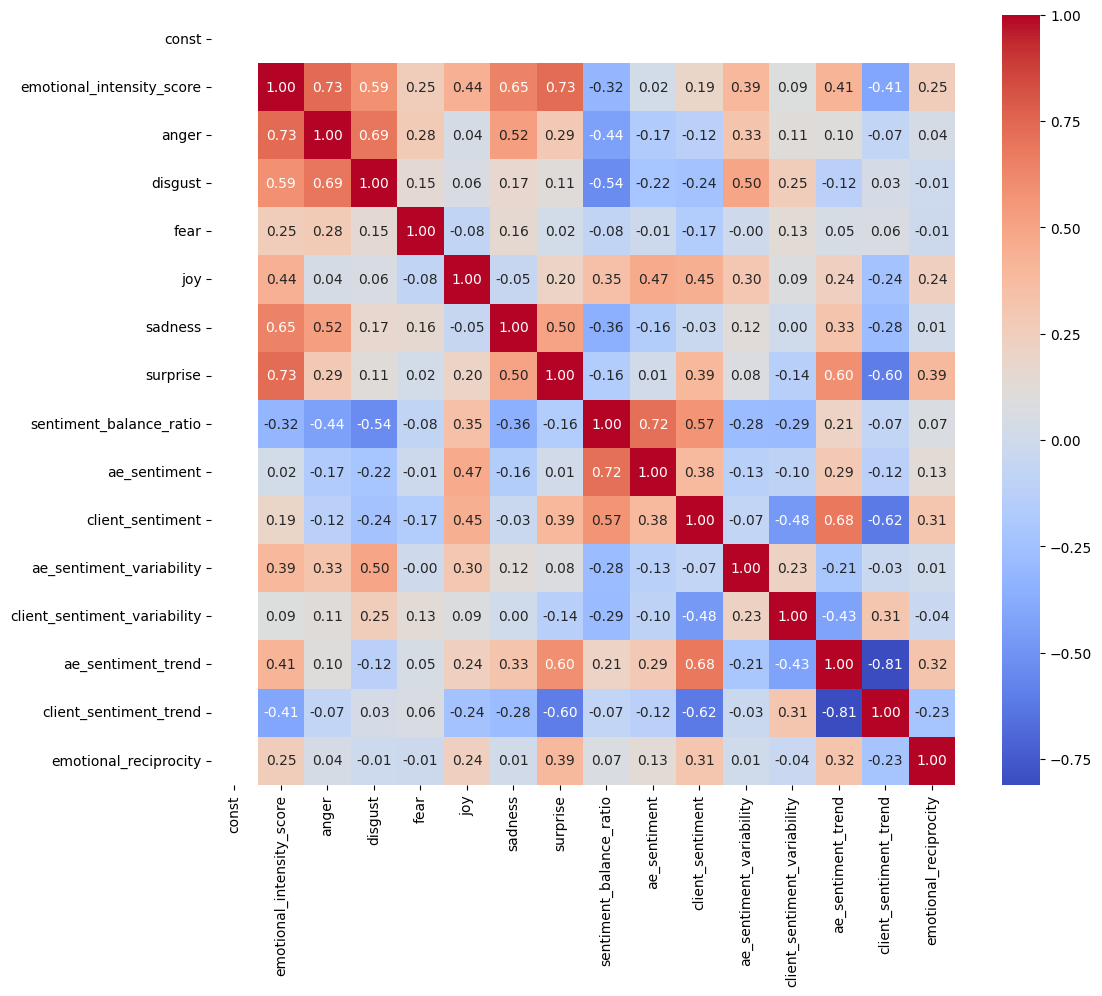

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Regression Coefficients and P-values

In [15]:
# Reset index to turn 'Variable' into a column
regression_df = regression_summary.reset_index()

# Rename columns for clarity
regression_df.rename(columns={
    'index': 'Variable',
    'Coef.': 'Regression Coefficient',
    'P>|z|': 'P-value (Regression)'
}, inplace=True)

# Remove 'const' from the variables
regression_df = regression_df[regression_df['Variable'] != 'const']


## Interpret Results

In [16]:
# Merge correlation and regression data
merged_df = pd.merge(
    corr_df,
    regression_df[['Variable', 'Regression Coefficient', 'P-value (Regression)']],
    on='Variable',
    how='left'
)

# Define interpretation based on p-value
def interpret_p_value(p_value):
    if pd.isnull(p_value):
        return 'N/A'
    elif p_value < 0.05:
        return 'Good Predictor'
    else:
        return 'Not a Good Predictor'

# Apply the interpretation to the merged DataFrame
merged_df['Interpretation'] = merged_df['P-value (Regression)'].apply(interpret_p_value)

## Present Results

In [17]:
# Rearranging columns for presentation
final_df = merged_df[[
    'Variable',
    'Correlation with Sales Outcome',
    'P-value (Correlation)',
    'Regression Coefficient',
    'P-value (Regression)',
    'Interpretation'
]]

# Format numerical values for better readability
final_df['Correlation with Sales Outcome'] = final_df['Correlation with Sales Outcome'].round(4)
final_df['P-value (Correlation)'] = final_df['P-value (Correlation)'].apply(lambda x: f"{x:.3f}")
final_df['Regression Coefficient'] = final_df['Regression Coefficient'].round(4)
final_df['P-value (Regression)'] = final_df['P-value (Regression)'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'N/A')

# Display the final table
final_df


,Variable,Correlation with Sales Outcome,P-value (Correlation),Regression Coefficient,P-value (Regression),Interpretation
0,emotional_intensity_score,0.1004,0.281,-2202.3610,1.000,Not a Good Predictor
1,anger,0.0991,0.288,437.8045,1.000,Not a Good Predictor
2,disgust,-0.0263,0.778,694.6955,1.000,Not a Good Predictor
3,fear,0.2288,0.013,276.4932,1.000,Not a Good Predictor
4,joy,-0.1533,0.099,772.2288,1.000,Not a Good Predictor
5,sadness,0.1852,0.046,610.5946,1.000,Not a Good Predictor
6,surprise,0.1502,0.106,922.7930,1.000,Not a Good Predictor
7,sentiment_balance_ratio,-0.2748,0.003,-1.1812,0.067,Not a Good Predictor
8,ae_sentiment,-0.2400,0.009,-0.4839,0.306,Not a Good Predictor
9,client_sentiment,-0.1810,0.051,0.2446,0.672,Not a Good Predictor
